In [217]:
N = 300
D = 2
K = 3

import matplotlib.pyplot as plt
import numpy as np
import math

X = np.random.rand(N,D)


R = np.repeat(([1,0,0],[0,1,0],[0,0,1]), int(N/K), axis=0)

#add some pattern
X[0:99,] = X[0:99,]+1
X[100:199,] = X[100:199,]+2


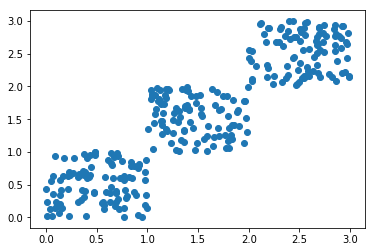

In [218]:
plt.scatter(X[:,0],X[:,1])

In [226]:
#x = [N, D]
#w = [K, D+1]
#r = [N, K]
def err(x, r, k, w):
    x_new = np.c_[np.ones(len(x)), x]
    
    err_count = 0
    err_sum = 0
    for t in range(len(x)):
        o = []
        for i in range(k):
            o.append(np.dot(np.transpose(w[i]), x_new[t]))
         
        y = []
        for i in range(k):
            y.append(math.exp(o[i]-max(o))/sum([math.exp(ok-max(o)) for ok in o])) #signmoid
            
        if (np.argmax(y) != np.argmax(r[t])):
            err_count += 1.0
        
        i = np.argmax(R[t])
        
        if (y[i] == 0):
            y[i] = 0.0000000000000000001
        
        err_sum = err_sum + -1*R[t][i]*math.log(y[i]) 
        
    return err_sum
            
    

def log_regression(x, r, d, K, eta, max_iterations):
    
    
    x_new = np.c_[np.ones(N),x] #with bias
    
    #For i = 1..K, For j = 0..D, wij <- rand(-0.01, 0.01)
    w = np.random.uniform(-0.01, 0.01, size=(K,d+1))
    
    #### UNCOMMENT TO CHECK FOR CONVERGENCE
#     error = 1000000000000
    
    #Repeat
    for epoch in range(max_iterations):
        
        #print("epoch:", epoch)
        
        #For i = 1..K, For j=0..d, delta_wij=0
        delta_w = np.zeros(shape=(K,d+1))
        
        #for i = 1..N
        for t in range(len(X)):
            
            #for i = 1..K (green box)
            o = []
            for i in range(K):
                o.append(0)
                for j in range(d+1):
                    o[i] = o[i] + w[i][j]*x_new[t][j]
            
            y = []
            for i in range(K):
                y.append(math.exp(o[i]-max(o))/(sum([math.exp(ok-max(o)) for ok in o])))
            
            #for i = 1..K (red box)
            for i in range(K):
                for j in range(d+1):
                    delta_w[i][j] = delta_w[i][j] + (r[t][i] - y[i])*x_new[t][j]
            
        for i in range(K):
            for j in range(d+1):
                w[i][j] = w[i][j] + eta*delta_w[i][j]
        
          #### UNCOMMENT TO CHECK FOR CONVERGENCE
#         error_new = err(X, R, K, w)
        
#         print("error_old:", error)
#         print("error_new:", error_new)
        
#         if (abs(error_new-error) < 0.001):
#             print("converged: erorr", np.round(error_new, 2))
#             return(w)
#         else:
#             error = error_new
    
#     print("not converged.  error:", np.round(error_new, 2))  
  
    return (w)

        

In [233]:
w = log_regression(X, R, D, K, 0.6, 1000)
w

array([[ 210.12457579, -106.78954526,   32.47434438],
       [-568.78542929,  269.58513093,   46.06966144],
       [ 358.67033834, -162.77578261,  -78.54740125]])

In [234]:
x_new = np.c_[np.ones(N), X]

#count number incorrect
error_count = 0.0

for t in range(N):
    o = []
    for i in range(K):
        o.append(np.dot(np.transpose(w[i]), x_new[t]))
    
    y = []
    for i in range(K):
        y.append(math.exp(o[i]-max(o))/sum([math.exp(ok - max(o)) for ok in o]))
        
    if (np.argmax(y) != np.argmax(R[t])):
        error_count += 1

print(error_count / N)
        

0.013333333333333334


In [235]:
err(X,R,K,w)

670.2306499769229